In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

C:\Users\Pulkit Raina\AppData\Local\Temp\ipykernel_10748\2349503410.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_start = pd.read_csv('50_Startups.csv')
df_start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df_start.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<Axes: title={'center': 'Profit Distribution Plot'}, xlabel='Profit', ylabel='Count'>

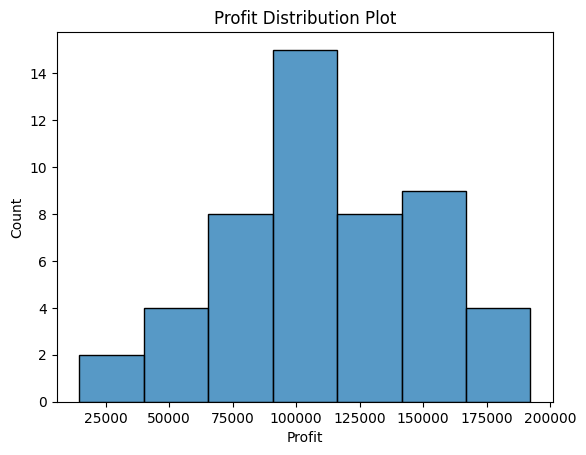

In [8]:
plt.title('Profit Distribution Plot')
sns.histplot(df_start['Profit'])

C:\Users\Pulkit Raina\AppData\Local\Temp\ipykernel_10748\790437562.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_start['Profit'])


<Axes: xlabel='Profit', ylabel='Density'>

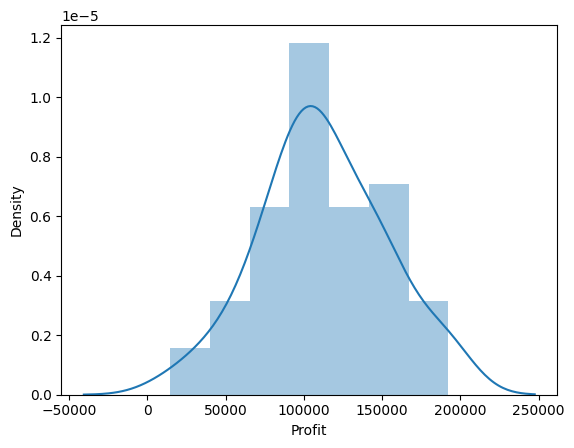

In [9]:
sns.distplot(df_start['Profit'])

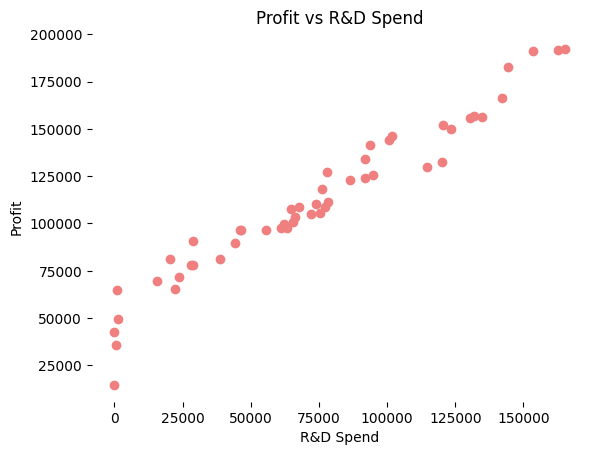

In [10]:
plt.scatter(df_start['R&D Spend'], df_start['Profit'], color = 'lightcoral')
plt.title('Profit vs R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.box(False)
plt.show()

In [15]:
X = df_start.iloc[:, :-1].values
y = df_start.iloc[:, -1].values

X = np.array(ct.fit_transform(X))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 2)
result = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
result

array([[103015.2 , 103282.38],
       [132582.28, 144259.4 ],
       [132447.74, 146121.95],
       [ 71976.1 ,  77798.83],
       [178537.48, 191050.39],
       [116161.24, 105008.31],
       [ 67851.69,  81229.06],
       [ 98791.73,  97483.56],
       [113969.44, 110352.25],
       [167921.07, 166187.94]])